## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# To display all the coloumn of dataset
pd.pandas.set_option('display.max_columns', None)


## Importing the dataset

In [2]:
df = pd.read_csv('datasets/transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Exploratory Data Analysis (EDA)

Description of each column of the dataset:
- Recency - months since the last donation
- Frequency - total number of donation
- Monetary - total blood donated in c.c.
- Time - months since the first donation
- a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [5]:
# Rename columns
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Blood_Donated']

In [6]:
df.head(2)

,Recency,Frequency,Monetary,Time,Blood_Donated
0,2,50,12500,98,1
1,0,13,3250,28,1


In [7]:
# Checking for missing value
df.isnull().sum()

Recency          0
Frequency        0
Monetary         0
Time             0
Blood_Donated    0
dtype: int64

Dataset doesn't contain any missing value.

In [8]:
# Checking for Null value
df.duplicated().any()

True

In [9]:
duplicate = df.duplicated(['Recency', 'Frequency', 'Monetary', 'Time', 'Blood_Donated'], keep=False)

In [10]:
df[duplicate].sort_values(['Recency', 'Frequency', 'Monetary', 'Time', 'Blood_Donated'])

,Recency,Frequency,Monetary,Time,Blood_Donated
154,2,1,250,2,0
155,2,1,250,2,0
156,2,1,250,2,0
157,2,1,250,2,0
158,2,1,250,2,0
...,...,...,...,...,...
447,23,2,500,26,0
452,23,2,500,28,0
723,23,2,500,28,0
496,38,1,250,38,0


In [11]:
# Removing the duplicate
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(533, 5)

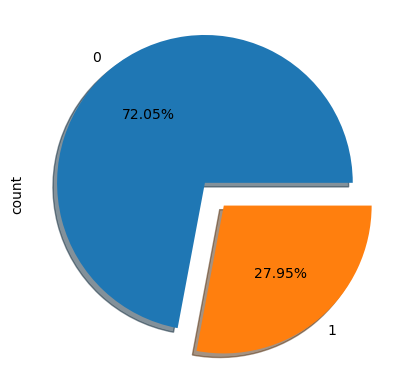

In [13]:
# Target Variable analysis
(df['Blood_Donated'].value_counts()).plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.show()

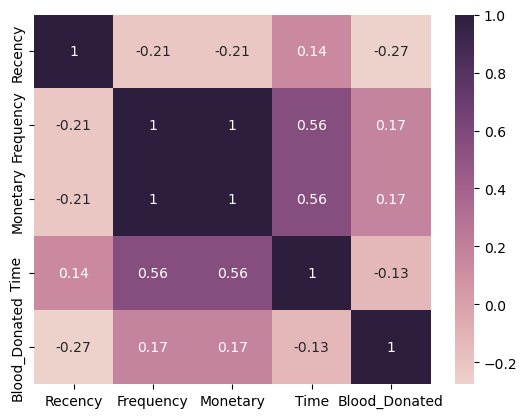

In [14]:
cm = df.corr()
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

## Spliting the dataset into train and test set 

In [15]:
X = df.drop('Blood_Donated', axis=1)
y = df['Blood_Donated'].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Building

In [18]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

In [19]:
bnb = BernoulliNB()
lrc = LogisticRegression()
svc = SVC (kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [20]:
clfs = {'NB':bnb, 'LR':lrc, 'SVC':svc, 'KNN':knc, 'DT':dtc, 'RF':rfc, 'XGB':xgb}

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def Train_Classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, precision, recall

In [22]:
accuracy_score_list = []
precision_score_list = []
recall_score_list = []

for name, clf in clfs.items():
    a, p, r = Train_Classifier(clf, X_train, y_train, X_test, y_test)

    accuracy_score_list.append(a)
    precision_score_list.append(p)
    recall_score_list.append(r)

In [23]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy': accuracy_score_list, 'Precision': precision_score_list, 'Recall': recall_score_list})

In [42]:
performance_df.round(2).sort_values('Accuracy', ascending=False)

,Algorithm,Accuracy,Precision,Recall
1,LR,0.78,0.47,0.39
3,KNN,0.75,0.41,0.39
5,RF,0.73,0.36,0.35
0,NB,0.72,0.32,0.26
6,XGB,0.72,0.32,0.26
2,SVC,0.67,0.27,0.30
4,DT,0.65,0.32,0.57


- **Conclusion:** After comparing the accuracy, precision and recall of all the models, it is evident that the `LogisticRegression` model performs better with test data. It achieves 78% accuracy.

------------------------------------------------------------------------------------------------------------------------------------------------------

- EvalML is an AutoML library that builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions.
- pip install evalml

In [28]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train= X_train, y_train= y_train, problem_type='binary')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 4.594445466995239,
  'Total time of batch': 4.777942657470703},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.8825395107269287,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 3.274937391281128,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 3.6690804958343506,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.336289882659912,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 9.198629379272461,
  'Total time of batch': 22.18022584915161}}

In [29]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,Logistic Regression Classifier w/ Label Encode...,6,0.548888,0.548888,0.006627,94.851338,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.548917,0.548917,0.006715,94.851071,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.565789,0.565789,0.007747,94.692804,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.622383,0.622383,0.023328,94.161951,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.637734,0.637734,0.047813,94.017957,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.681273,0.681273,0.053891,93.609552,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,10.660799,10.660799,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [38]:
best_pipeline = automl.best_pipeline

In [39]:
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


************************************************************************************************************
* Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer *
************************************************************************************************************

Problem Type: binary
Model Family: Linear

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Standard Scaler
4. Select Columns Transformer
	 * columns : [0, 3]
5. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1
	 * multi_class : auto
	 * solver : lbfgs

Training
Training for binary problems.
Total training time (including CV): 9.2 seconds

Cross Validation
----------------
             Log Loss Bi

In [40]:
best_pipeline.score(X_test, y_test, objectives=["auc", "f1", "Precision", "Recall"])

OrderedDict([('AUC', 0.6953933747412009),
             ('F1', 0.37894736842105264),
             ('Precision', 0.25),
             ('Recall', 0.782608695652174)])

AutoML library **EvalML** is also selecting Logistic Regession as the best model among all mmodel.